In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train_final_less_filtering.csv', index_col=0)
df_train=pd.read_parquet('features_folder/unique_eegid/train_unique_eegid_mrgd_votes_feats_from_eeg_to_spec.parquet')

In [3]:
vote_cats=['seizure_vote', 'lpd_vote',	'gpd_vote',	'lrda_vote',	'grda_vote',	'other_vote']

In [4]:
d={'Seizure': {'eeg':3945687482, 'spec':716859663},
'LPD': {'eeg':1572717157, 'spec':15428069} ,
'GPD': {'eeg':3701757135, 'spec':10530005},
'LRDA': {'eeg':722738444, 'spec':999431},
'GRDA': {'eeg':1353894913, 'spec':55402525},
'Other': {'eeg':1445780287, 'spec':4004824}
}

In [5]:
eeg_path='hms-harmful-brain-activity-classification/train_eegs/'
spec_path='hms-harmful-brain-activity-classification/train_spectrograms/'

In [109]:
def eeg_data(data):
    LL_data = pd.DataFrame()
    RL_data = pd.DataFrame()
    LP_data = pd.DataFrame()
    RP_data = pd.DataFrame()
    C_data = pd.DataFrame()

    LL_data['Fp1 - F7'] = data['Fp1'] - data['F7']
    LL_data['F7 - T3'] = data['F7'] - data['T3']
    LL_data['T3 - T5'] = data['T3'] - data['T5']
    LL_data['T5 - O1'] = data['T5'] - data['O1']

    RL_data['Fp2 - F8'] = data['Fp2'] - data['F8']
    RL_data['F8 - T4'] = data['F8'] - data['T4']
    RL_data['T4 - T6'] = data['T4'] - data['T6']
    RL_data['T6 - O2'] = data['T6'] - data['O2']

    LP_data['Fp1 - F3'] = data['Fp1'] - data['F3']
    LP_data['F3 - C3'] = data['F3'] - data['C3']
    LP_data['C3 - P3'] = data['C3'] - data['P3']
    LP_data['P3 - O1'] = data['P3'] - data['O1']

    RP_data['Fp2 - F4'] = data['Fp2'] - data['F4']
    RP_data['F4 - C4'] = data['F4'] - data['C4']
    RP_data['C4 - P4'] = data['C4'] - data['P4']
    RP_data['P4 - O2'] = data['P4'] - data['O2']

    C_data['Fz - Cz'] = data['Fz'] - data['Cz']
    C_data['Cz - Pz'] = data['Cz'] - data['Pz']

    return LL_data, RL_data, LP_data , RP_data, C_data
    
 

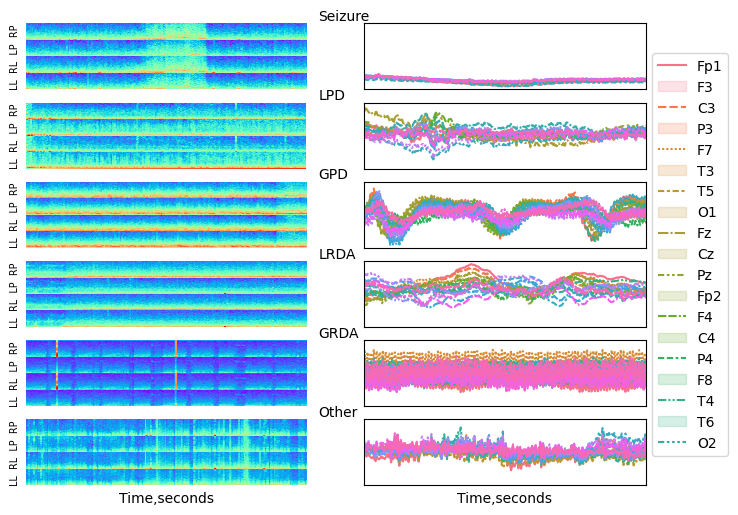

In [31]:

h=6
w=8
fig, ax=plt.subplots(6,2, figsize=(w,h),  sharex=True)

for i,cat in enumerate(d):
    sns.heatmap(pd.read_parquet(f'{spec_path}{d[cat]["spec"]}.parquet').transpose().iloc[::-1].apply(func='log'),
                         cmap='rainbow', cbar=False,  ax=ax[i,0])
    eeg=pd.read_parquet(f'{eeg_path}{d[cat]["eeg"]}.parquet').iloc[200*20:200*30, :19]
    sns.lineplot(np.array(eeg),legend=False, ax=ax[i,1])
   
    ax[i,0].get_xaxis().set_ticks([])
    ax[i,0].get_yaxis().set_ticks([])
    ax[i,0].set_ylabel('LL  RL  LP  RP', fontsize='x-small')
    ax[i,0].text(320,-20, f'{cat}')

    ax[i,1].get_xaxis().set_ticks([])
    ax[i,1].get_yaxis().set_ticks([])
    
 

ax[5,0].set_xlabel('Time,seconds')
ax[5,1].set_xlabel('Time,seconds')
ax[5,1].legend(eeg.columns, loc='center left', bbox_to_anchor=(1, 3.5))
plt.show()

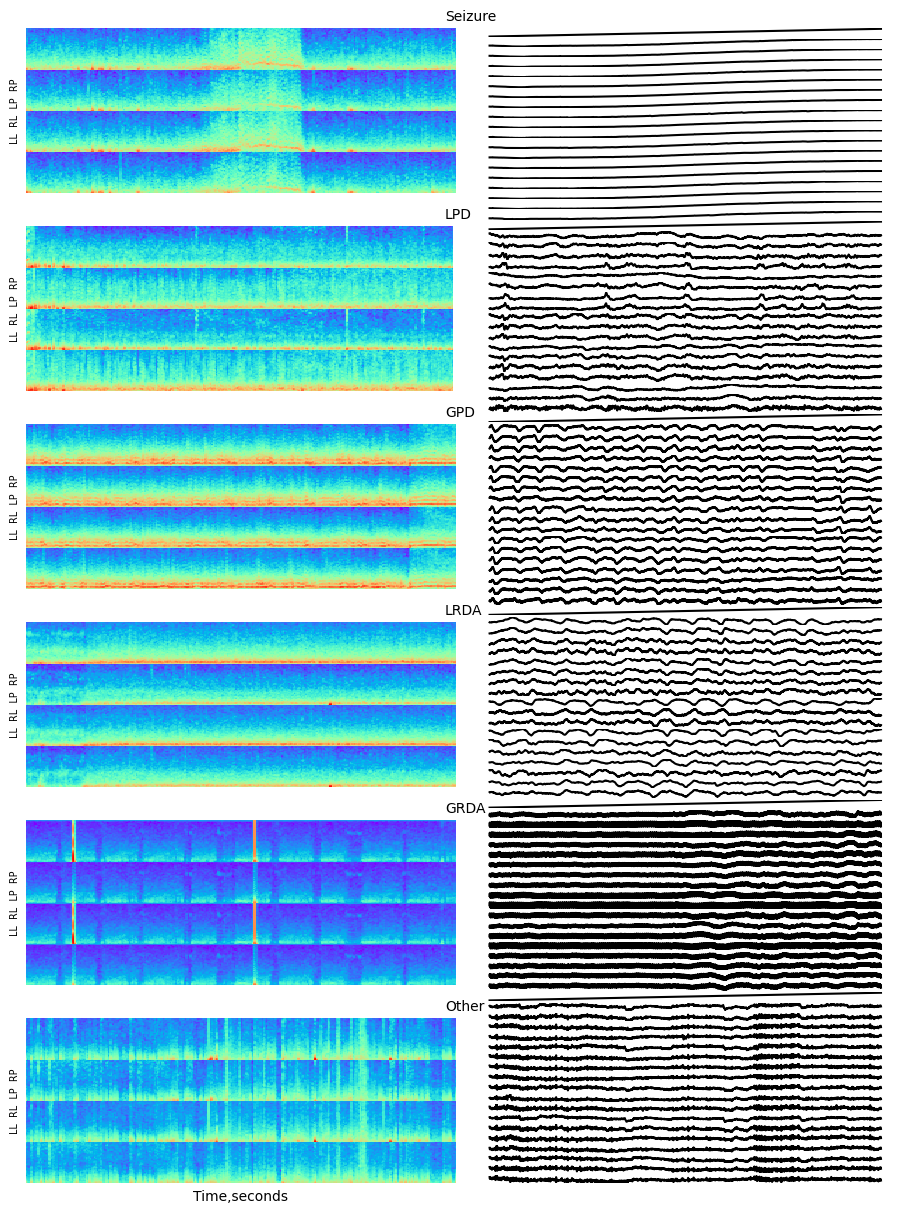

In [24]:

fig = plt.figure( figsize=(10, 15))
subfigs = fig.subfigures(1, 2, wspace=-0.2)

n_eeg=19
axsLeft = subfigs[0].subplots( 6,1, sharex=True)
axsRight = subfigs[1].subplots( 6*n_eeg,1, sharex=True)

for i,cat in enumerate(d):
    spec=pd.read_parquet(f'{spec_path}{d[cat]["spec"]}.parquet').transpose().iloc[::-1].apply(func='log')
    eeg=pd.read_parquet(f'{eeg_path}{d[cat]["eeg"]}.parquet').iloc[200*20:200*30, :n_eeg].reset_index()

    sns.heatmap(spec, cmap='rainbow', cbar=False,  ax=axsLeft[i])
    axsLeft[i].get_xaxis().set_ticks([])
    axsLeft[i].get_yaxis().set_ticks([])
    axsLeft[i].set_ylabel('LL  RL  LP  RP', fontsize='x-small')
    axsLeft[i].text(300,-20, f'{cat}')
    for j in range(n_eeg):
        sns.lineplot(eeg.iloc[:,j], legend=False, ax=axsRight[i*n_eeg+j], color='black')
        #axsRight[i*n_eeg+j].get_xaxis().set_ticks([])
        #axsRight[i*n_eeg+j].get_yaxis().set_ticks([])
        axsRight[i*n_eeg+j].axis('off')
    
 

axsLeft[5].set_xlabel('Time,seconds')
axsRight[6*n_eeg-1].set_xlabel('Time,seconds')
plt.show()